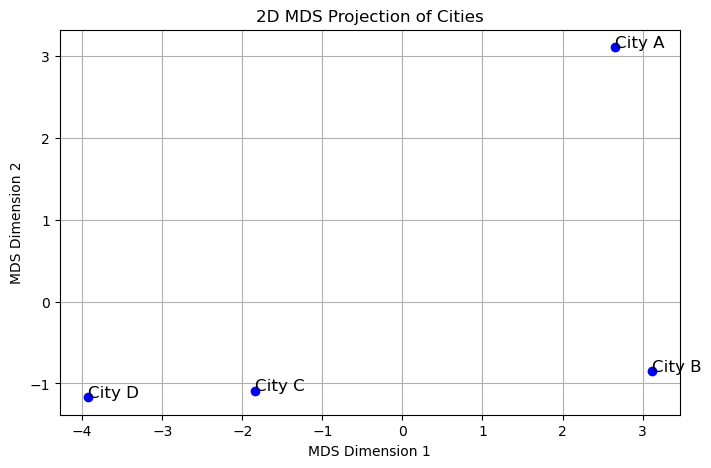

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Dissimilarity matrix representing distances (in hours)
dissimilarities = np.array([
    [0, 4, 6, 8],
    [4, 0, 5, 7],
    [6, 5, 0, 2],
    [8, 7, 2, 0]
])

# Applying MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
points = mds.fit_transform(dissimilarities)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.scatter(points[:, 0], points[:, 1], color='blue')

# Adding labels to the points
city_names = ['City A', 'City B', 'City C', 'City D']
for i, name in enumerate(city_names):
    plt.text(points[i, 0], points[i, 1], name, fontsize=12)

plt.title("2D MDS Projection of Cities")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.grid()
plt.show()

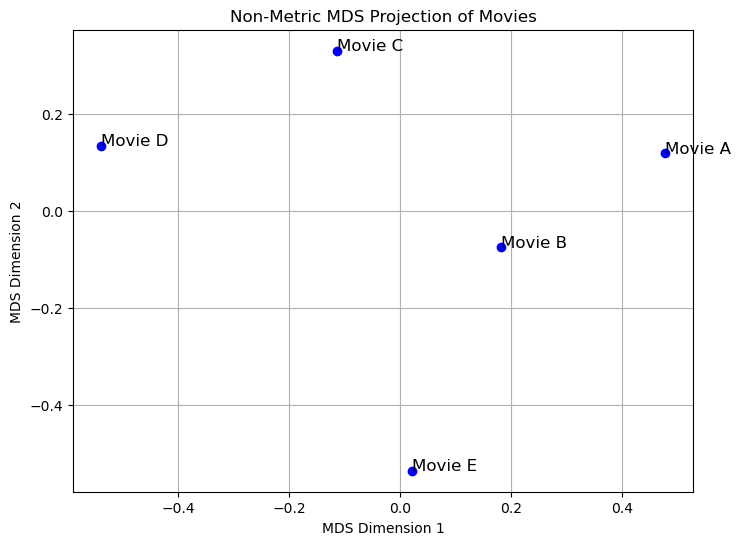

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Create a ranked dissimilarity matrix (ordinal data)
# Movies: ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E']
# 1 = most similar, 10 = least similar
ranked_dissimilarities = np.array([
    [0, 2, 7, 6, 9],
    [2, 0, 3, 8, 5],
    [7, 3, 0, 4, 6],
    [6, 8, 4, 0, 7],
    [9, 5, 6, 7, 0]
])

# Apply Non-Metric MDS with 2 components
mds = MDS(n_components=2, dissimilarity="precomputed", metric=False, random_state=42)
points = mds.fit_transform(ranked_dissimilarities)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], color='blue')

# Add labels for each movie
movie_names = ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E']
for i, name in enumerate(movie_names):
    plt.text(points[i, 0], points[i, 1], name, fontsize=12)

plt.title("Non-Metric MDS Projection of Movies")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.grid()
plt.show()

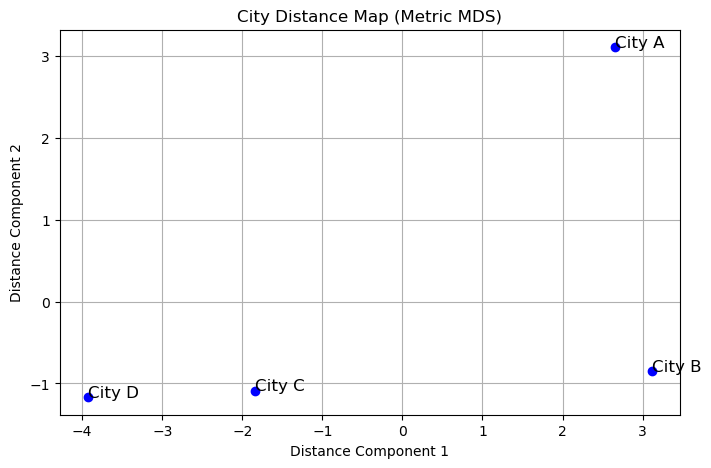

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Dissimilarity matrix representing travel time (in hours)
dissimilarities = np.array([
    [0, 4, 6, 8],
    [4, 0, 5, 7],
    [6, 5, 0, 2],
    [8, 7, 2, 0]
])

# Apply Metric MDS
mds = MDS(n_components=2, dissimilarity="precomputed", metric=True, random_state=42)
points = mds.fit_transform(dissimilarities)

# Plotting the results with descriptive labels
plt.figure(figsize=(8, 5))
plt.scatter(points[:, 0], points[:, 1], color='blue')

# Add labels for each city
city_names = ['City A', 'City B', 'City C', 'City D']
for i, name in enumerate(city_names):
    plt.text(points[i, 0], points[i, 1], name, fontsize=12)

# Enhanced labels and title
plt.title("City Distance Map (Metric MDS)")
plt.xlabel("Distance Component 1")
plt.ylabel("Distance Component 2")
plt.grid()
plt.show()

Demonstrating why MDS dimensions don't have well-defined labels:

Example 1: Economic Indicators
Note: Even though we know these distances represent economic similarities,
the resulting dimensions don't have clear labels like 'GDP' or 'Trade Balance'


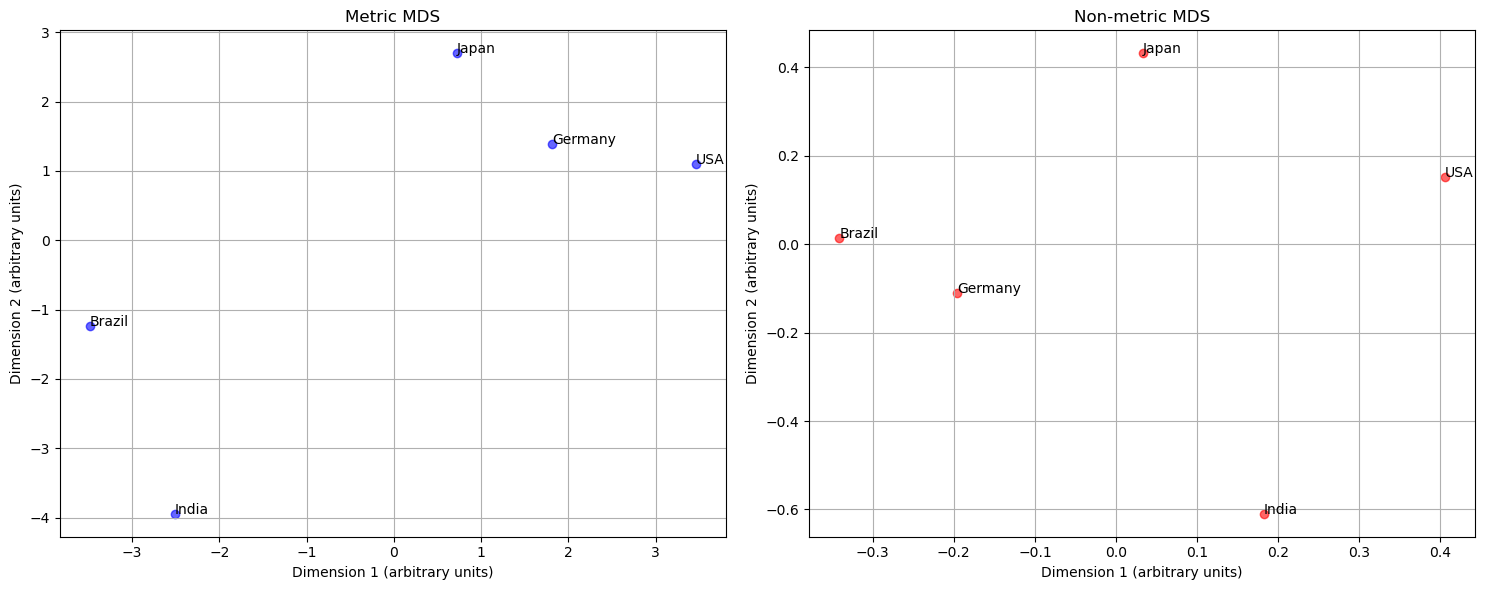


Example 2: Color Perceptual Distances
Note: Even though we might expect dimensions like 'Hue' and 'Brightness',
MDS produces arbitrary dimensions that don't directly correspond to these properties


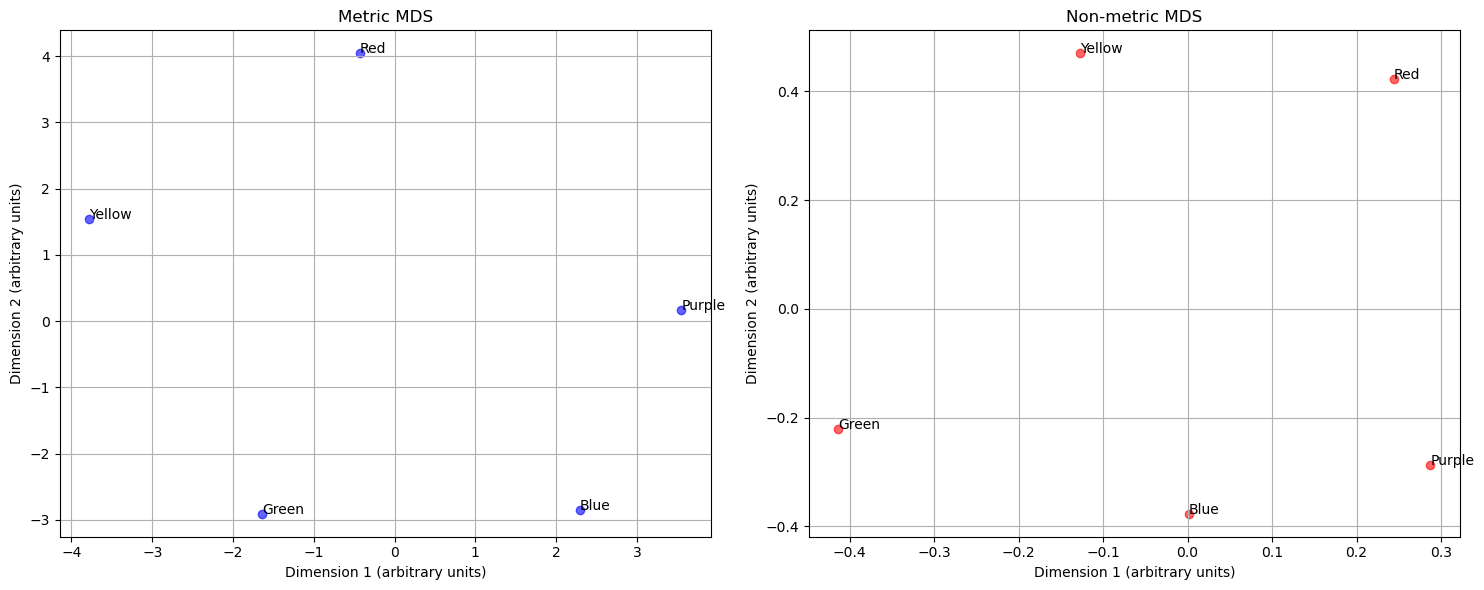


Example 3: Attempting to Interpret Dimensions


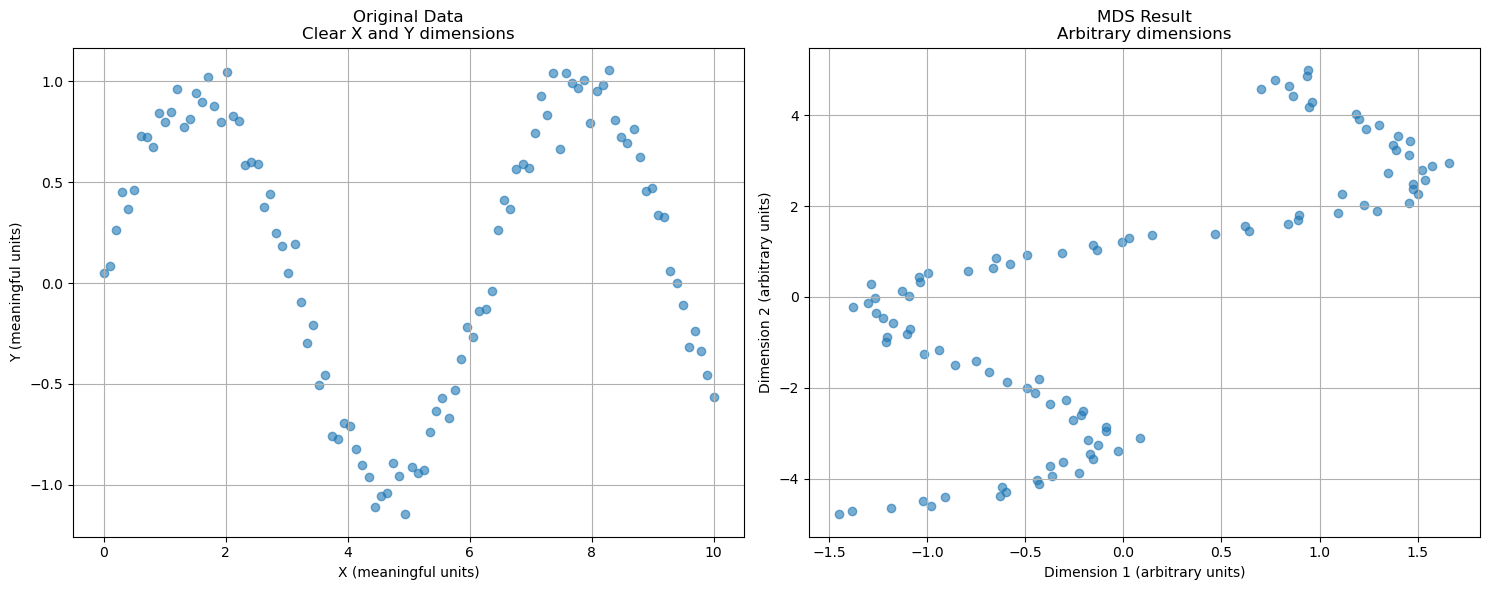

In [4]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Function to create and visualize both metric and non-metric MDS
def compare_mds_types(distances, labels, feature_names=None):
    """
    Compare metric and non-metric MDS and demonstrate dimension interpretation
    """
    # Create both types of MDS
    mds_metric = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    mds_nonmetric = MDS(n_components=2, dissimilarity='precomputed', random_state=42, metric=False)
    
    # Fit both types
    coords_metric = mds_metric.fit_transform(distances)
    coords_nonmetric = mds_nonmetric.fit_transform(distances)
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot metric MDS
    ax1.scatter(coords_metric[:, 0], coords_metric[:, 1], c='blue', alpha=0.6)
    for i, label in enumerate(labels):
        ax1.annotate(label, (coords_metric[i, 0], coords_metric[i, 1]))
    ax1.set_title('Metric MDS')
    ax1.set_xlabel('Dimension 1 (arbitrary units)')
    ax1.set_ylabel('Dimension 2 (arbitrary units)')
    ax1.grid(True)
    
    # Plot non-metric MDS
    ax2.scatter(coords_nonmetric[:, 0], coords_nonmetric[:, 1], c='red', alpha=0.6)
    for i, label in enumerate(labels):
        ax2.annotate(label, (coords_nonmetric[i, 0], coords_nonmetric[i, 1]))
    ax2.set_title('Non-metric MDS')
    ax2.set_xlabel('Dimension 1 (arbitrary units)')
    ax2.set_ylabel('Dimension 2 (arbitrary units)')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return coords_metric, coords_nonmetric

# Example 1: Countries and their economic indicators
def economic_example():
    print("\nExample 1: Economic Indicators")
    # Create synthetic data for countries based on economic indicators
    countries = ["USA", "Germany", "Japan", "Brazil", "India"]
    
    # Distance matrix based on economic similarities
    distances = np.array([
        [0, 2, 3, 7, 8],
        [2, 0, 2, 6, 7],
        [3, 2, 0, 6, 7],
        [7, 6, 6, 0, 3],
        [8, 7, 7, 3, 0]
    ])
    
    print("Note: Even though we know these distances represent economic similarities,")
    print("the resulting dimensions don't have clear labels like 'GDP' or 'Trade Balance'")
    
    coords_metric, coords_nonmetric = compare_mds_types(distances, countries)

# Example 2: Colors and their perceptual distances
def color_example():
    print("\nExample 2: Color Perceptual Distances")
    colors = ["Red", "Blue", "Green", "Yellow", "Purple"]
    
    # Distance matrix based on perceptual color differences
    distances = np.array([
        [0, 8, 7, 4, 5],
        [8, 0, 4, 7, 3],
        [7, 4, 0, 5, 6],
        [4, 7, 5, 0, 8],
        [5, 3, 6, 8, 0]
    ])
    
    print("Note: Even though we might expect dimensions like 'Hue' and 'Brightness',")
    print("MDS produces arbitrary dimensions that don't directly correspond to these properties")
    
    coords_metric, coords_nonmetric = compare_mds_types(distances, colors)

# Example 3: Attempt to interpret dimensions
def interpret_dimensions():
    print("\nExample 3: Attempting to Interpret Dimensions")
    
    # Create synthetic data with known underlying dimensions
    np.random.seed(42)
    n_samples = 100
    
    # Generate 2D data with clear structure
    x = np.linspace(0, 10, n_samples)
    y = np.sin(x) + np.random.normal(0, 0.1, n_samples)
    
    # Create distance matrix
    points = np.column_stack([x, y])
    distances = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            distances[i,j] = np.sqrt(np.sum((points[i] - points[j])**2))
    
    # Apply MDS
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    coords = mds.fit_transform(distances)
    
    # Plot original data vs MDS result
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    ax1.scatter(x, y, alpha=0.6)
    ax1.set_title('Original Data\nClear X and Y dimensions')
    ax1.set_xlabel('X (meaningful units)')
    ax1.set_ylabel('Y (meaningful units)')
    ax1.grid(True)
    
    ax2.scatter(coords[:, 0], coords[:, 1], alpha=0.6)
    ax2.set_title('MDS Result\nArbitrary dimensions')
    ax2.set_xlabel('Dimension 1 (arbitrary units)')
    ax2.set_ylabel('Dimension 2 (arbitrary units)')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("Demonstrating why MDS dimensions don't have well-defined labels:")
    economic_example()
    color_example()
    interpret_dimensions()

# Cluster Analysis (K means)

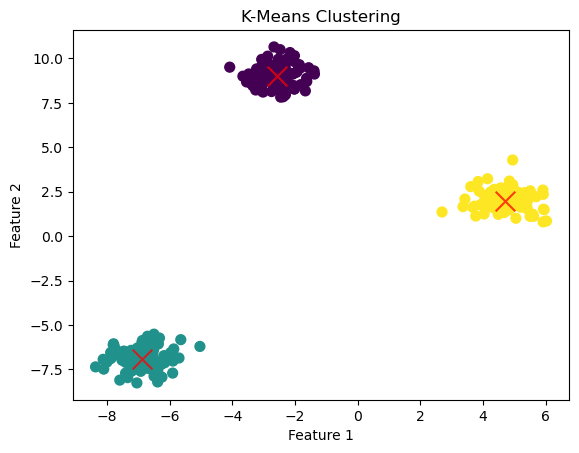

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data with 3 clusters
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

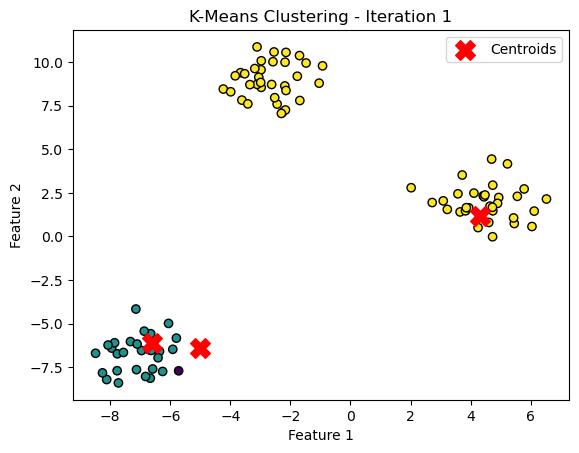

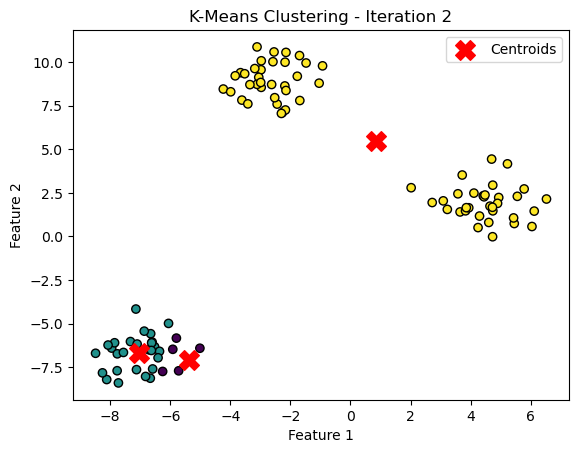

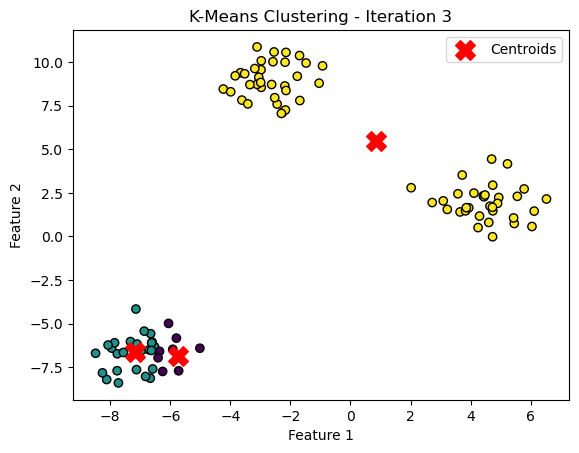

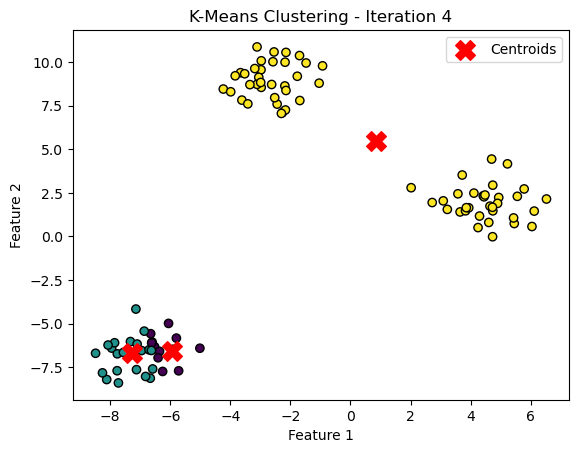

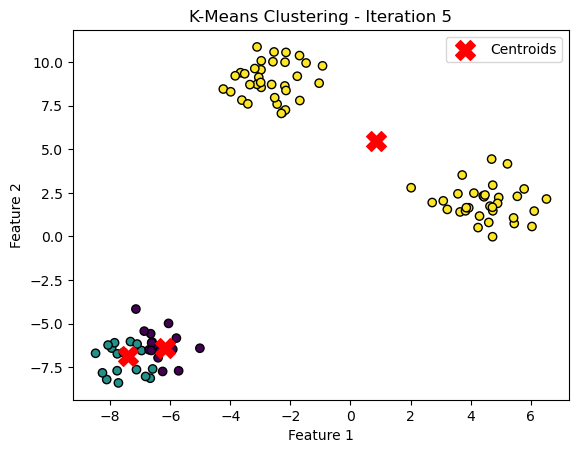

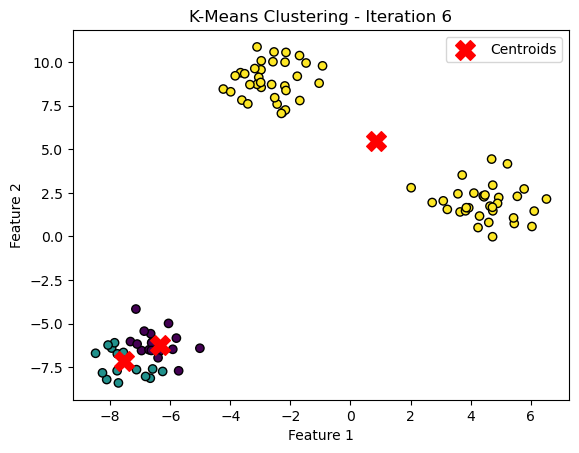

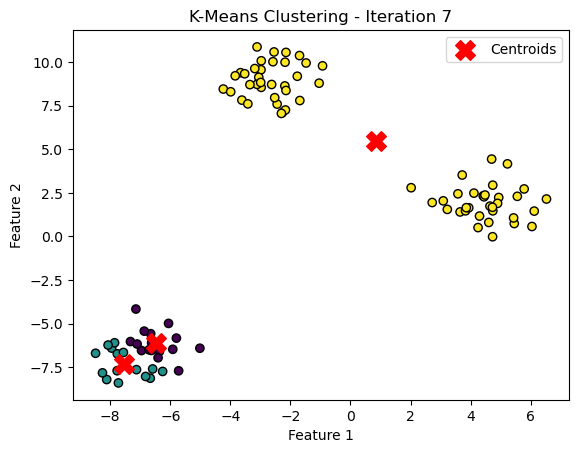

Converged after 7 iterations.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1, random_state=42)

def plot_kmeans(X, centroids, clusters, iteration):
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
    plt.title(f'K-Means Clustering - Iteration {iteration}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# K-means clustering initialization
def initialize_centroids(X, k):
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])
    return X[random_indices[:k]]

# Assign each point to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

# Update centroids by computing the mean of points in each cluster
def update_centroids(X, clusters, k):
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Perform K-means clustering and visualize each iteration
def kmeans_visualize(X, k, max_iterations=10):
    centroids = initialize_centroids(X, k)
    for i in range(max_iterations):
        clusters = assign_clusters(X, centroids)
        plot_kmeans(X, centroids, clusters, i+1)
        new_centroids = update_centroids(X, clusters, k)
        if np.all(centroids == new_centroids):
            print(f"Converged after {i+1} iterations.")
            break
        centroids = new_centroids

# Set parameters and run the visualization
k = 3  # Number of clusters
kmeans_visualize(X, k)

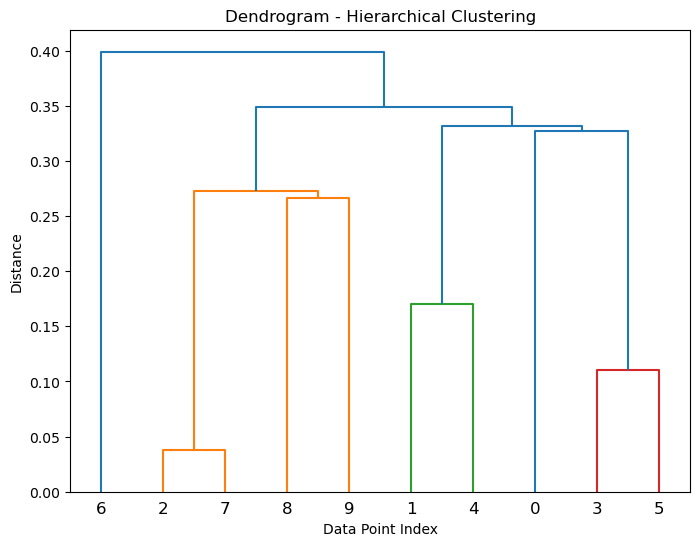

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(10, 2)  # 10 data points in 2D space

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and plot dendrogram
    plt.figure(figsize=(8, 6))
    dendrogram(model, **kwargs)
    plt.xlabel("Data Point Index")
    plt.ylabel("Distance")
    plt.title("Dendrogram - Hierarchical Clustering")
    plt.show()

# Perform hierarchical clustering using single linkage
Z = linkage(X, method='single')  # Single linkage criterion

# Plot each step of the clustering process
plot_dendrogram(Z)

# PCA with MNIST


Loading MNIST dataset...
Data loaded. Training set shape: (8000, 784)

Performing PCA with all components...
PCA completed in 1.50 seconds
Transformed training set shape: (8000, 784)

Plotting explained variance analysis...


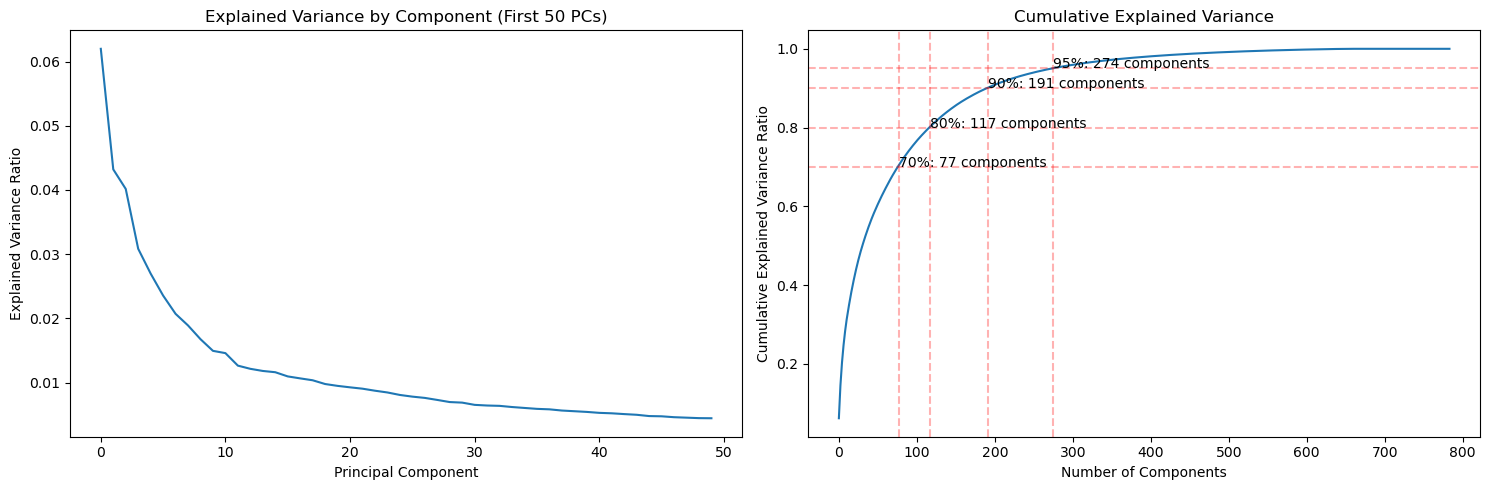


Visualizing principal components...


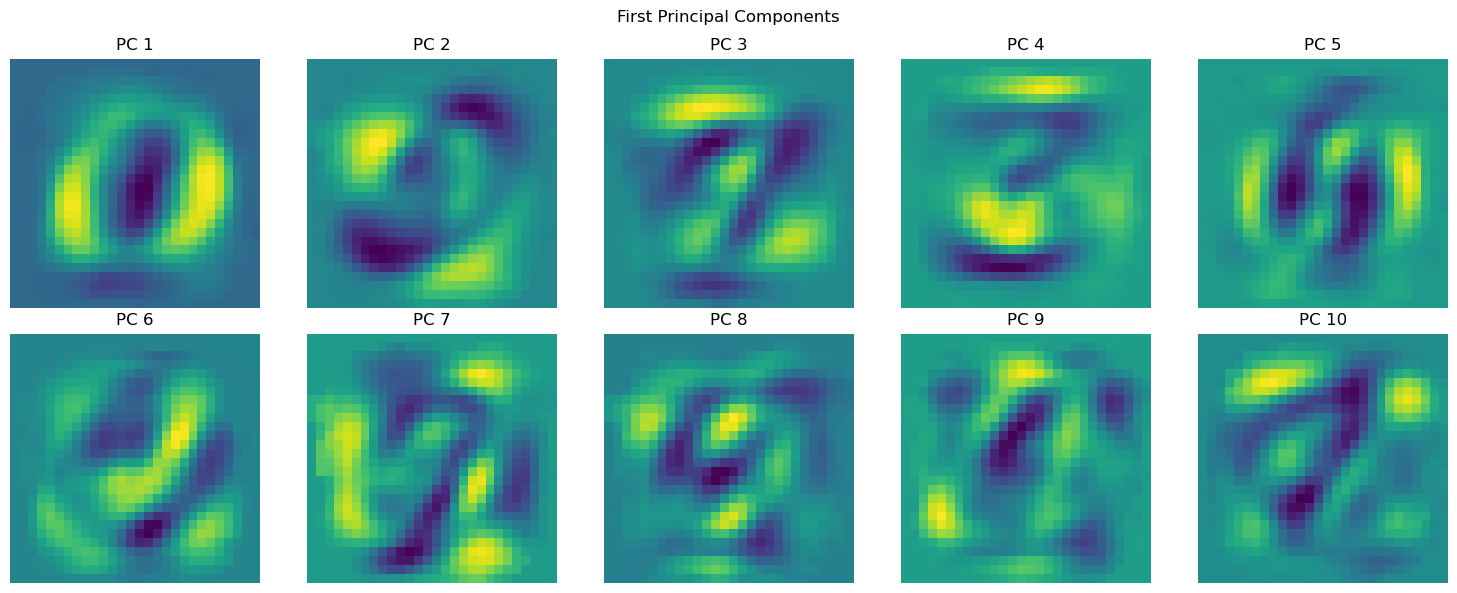


Demonstrating image reconstruction with different numbers of components...


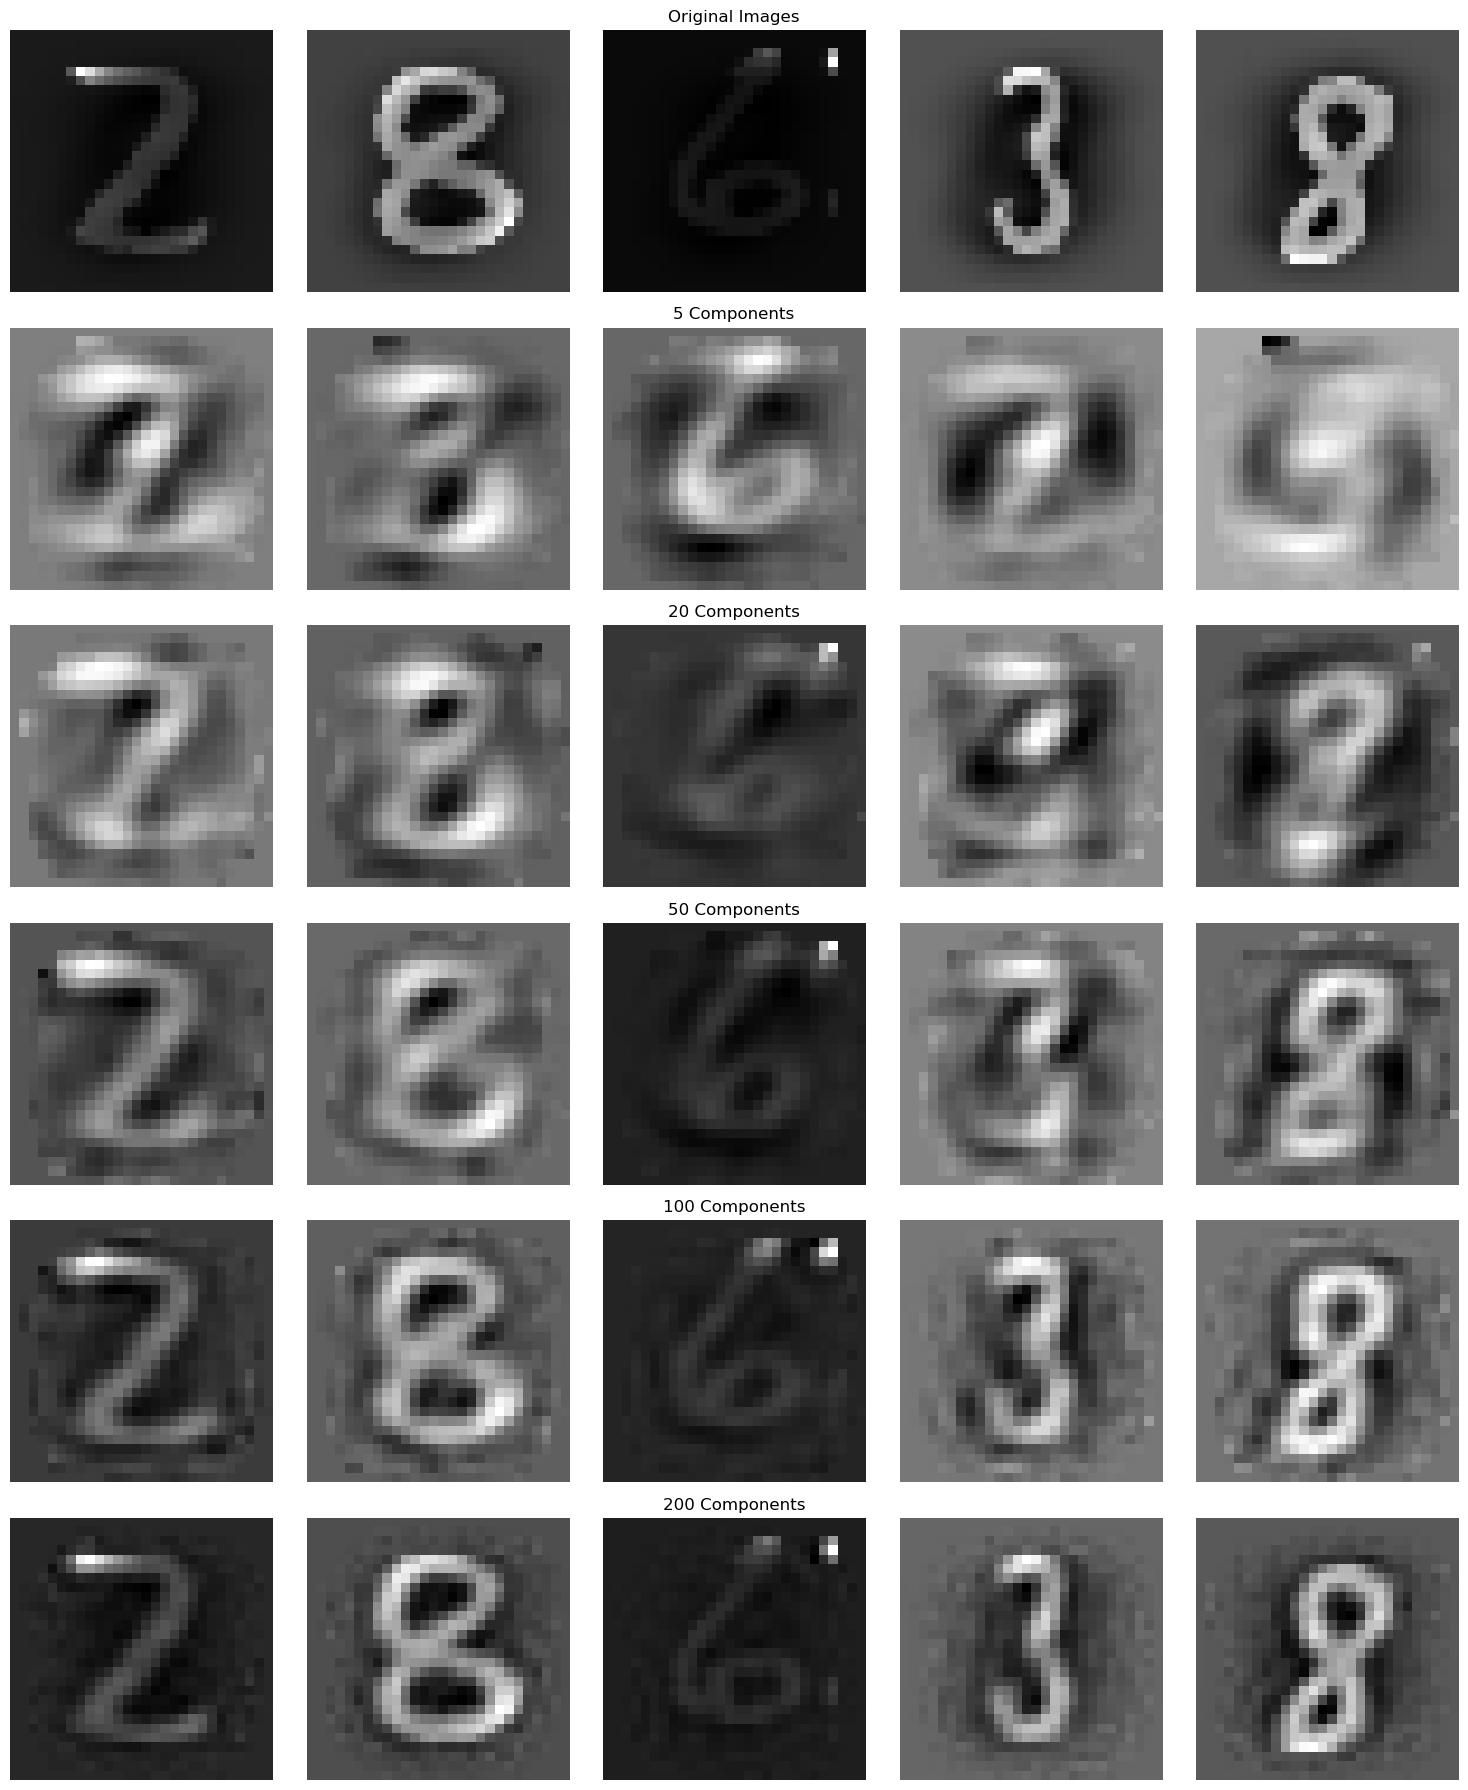


Analyzing reconstruction error...


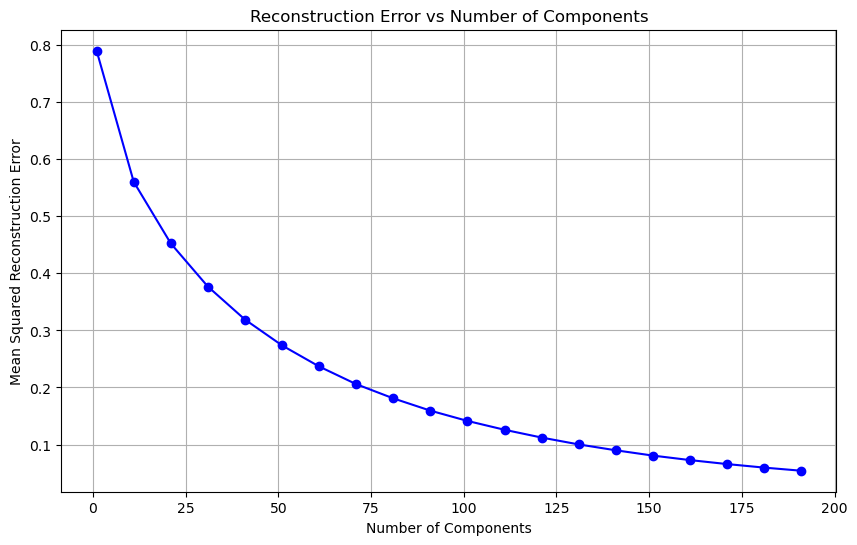

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from time import time

class MNISTPCAAnalyzer:
    def __init__(self):
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.pca = None
        self.X_train_pca = None
        self.X_test_pca = None
        
    def load_data(self, n_samples=None):
        """Load MNIST data"""
        print("Loading MNIST dataset...")
        X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
        
        if n_samples:
            X = X[:n_samples]
            y = y[:n_samples]
            
        # Scale data
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        
        # Split data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        print(f"Data loaded. Training set shape: {self.X_train.shape}")
        
    def perform_pca_analysis(self, n_components=None):
        """Perform PCA with specified number of components"""
        print(f"\nPerforming PCA with {n_components if n_components else 'all'} components...")
        t0 = time()
        
        self.pca = PCA(n_components=n_components)
        self.X_train_pca = self.pca.fit_transform(self.X_train)
        self.X_test_pca = self.pca.transform(self.X_test)
        
        print(f"PCA completed in {time() - t0:.2f} seconds")
        print(f"Transformed training set shape: {self.X_train_pca.shape}")
        
    def plot_explained_variance(self):
        """Plot explained variance ratio and cumulative explained variance"""
        plt.figure(figsize=(15, 5))
        
        # Individual explained variance
        plt.subplot(1, 2, 1)
        plt.plot(self.pca.explained_variance_ratio_[:50])
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Explained Variance by Component (First 50 PCs)')
        
        # Cumulative explained variance
        plt.subplot(1, 2, 2)
        cumsum = np.cumsum(self.pca.explained_variance_ratio_)
        plt.plot(cumsum)
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance Ratio')
        plt.title('Cumulative Explained Variance')
        
        # Add markers for different variance thresholds
        thresholds = [0.7, 0.8, 0.9, 0.95]
        for threshold in thresholds:
            n_components = np.argmax(cumsum >= threshold) + 1
            plt.axhline(y=threshold, color='r', linestyle='--', alpha=0.3)
            plt.axvline(x=n_components, color='r', linestyle='--', alpha=0.3)
            plt.annotate(f'{threshold:.0%}: {n_components} components', 
                        xy=(n_components, threshold))
            
        plt.tight_layout()
        plt.show()
        
    def visualize_components(self, n_components=10):
        """Visualize first n principal components as images"""
        fig, axes = plt.subplots(2, n_components//2, figsize=(15, 6))
        axes = axes.ravel()
        
        for i in range(n_components):
            component = self.pca.components_[i].reshape(28, 28)
            axes[i].imshow(component, cmap='viridis')
            axes[i].axis('off')
            axes[i].set_title(f'PC {i+1}')
            
        plt.suptitle('First Principal Components')
        plt.tight_layout()
        plt.show()
        
    def reconstruct_and_compare(self, n_components_list=[5, 20, 50, 100, 200]):
        """Reconstruct images using different numbers of components"""
        n_samples = 5
        fig, axes = plt.subplots(len(n_components_list) + 1, n_samples, 
                                figsize=(15, 3*(len(n_components_list) + 1)))
        
        # Display original images
        for i in range(n_samples):
            axes[0, i].imshow(self.X_test[i].reshape(28, 28), cmap='gray')
            axes[0, i].axis('off')
            if i == n_samples//2:
                axes[0, i].set_title('Original Images')
        
        # Display reconstructed images
        for i, n in enumerate(n_components_list):
            pca_temp = PCA(n_components=n)
            X_transformed = pca_temp.fit_transform(self.X_test)
            X_reconstructed = pca_temp.inverse_transform(X_transformed)
            
            for j in range(n_samples):
                axes[i+1, j].imshow(X_reconstructed[j].reshape(28, 28), cmap='gray')
                axes[i+1, j].axis('off')
                if j == n_samples//2:
                    axes[i+1, j].set_title(f'{n} Components')
        
        plt.tight_layout()
        plt.show()
        
    def calculate_reconstruction_error(self, max_components=200):
        """Calculate and plot reconstruction error vs number of components"""
        n_components_range = np.arange(1, max_components + 1, 10)
        reconstruction_errors = []
        
        for n in n_components_range:
            pca_temp = PCA(n_components=n)
            X_transformed = pca_temp.fit_transform(self.X_test)
            X_reconstructed = pca_temp.inverse_transform(X_transformed)
            error = np.mean((self.X_test - X_reconstructed) ** 2)
            reconstruction_errors.append(error)
            
        plt.figure(figsize=(10, 6))
        plt.plot(n_components_range, reconstruction_errors, 'bo-')
        plt.xlabel('Number of Components')
        plt.ylabel('Mean Squared Reconstruction Error')
        plt.title('Reconstruction Error vs Number of Components')
        plt.grid(True)
        plt.show()
        
def run_mnist_analysis():
    # Initialize analyzer
    analyzer = MNISTPCAAnalyzer()
    
    # Load data
    analyzer.load_data(n_samples=10000)  # Using 10000 samples for faster computation
    
    # Perform PCA
    analyzer.perform_pca_analysis()
    
    # Plot explained variance
    print("\nPlotting explained variance analysis...")
    analyzer.plot_explained_variance()
    
    # Visualize components
    print("\nVisualizing principal components...")
    analyzer.visualize_components()
    
    # Reconstruct images
    print("\nDemonstrating image reconstruction with different numbers of components...")
    analyzer.reconstruct_and_compare()
    
    # Calculate reconstruction error
    print("\nAnalyzing reconstruction error...")
    analyzer.calculate_reconstruction_error()

if __name__ == "__main__":
    run_mnist_analysis()

# PCA Second Attempt with Claude

### basic takeaway is that each feature is a dimension --> highly dimensional data is compute intensive and we can slim down the models while making them faster with PCA

### plus, most of the data is preserved despite having much fewer dimensions and can help reduce in overfitting 

### how many dimensions do I choose from x to y? No idea 

Loading MNIST data...


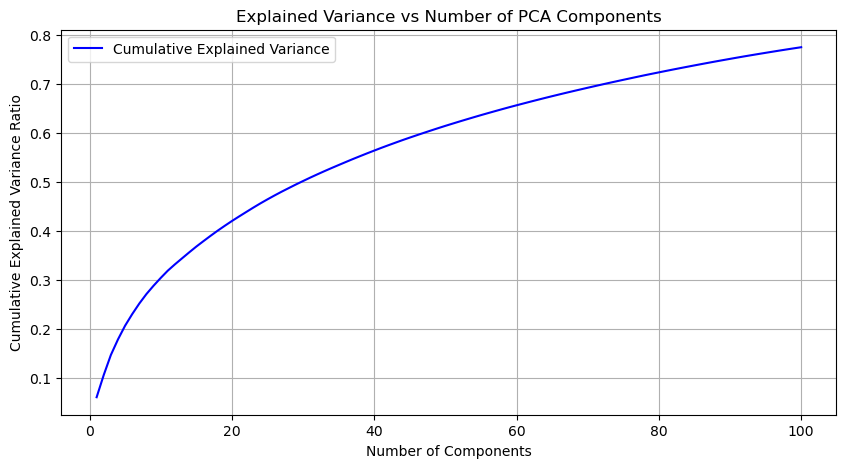

Components needed for 70.0% variance: 73
Components needed for 80.0% variance: 1
Components needed for 90.0% variance: 1
Components needed for 95.0% variance: 1

Reconstruction using 10 components:


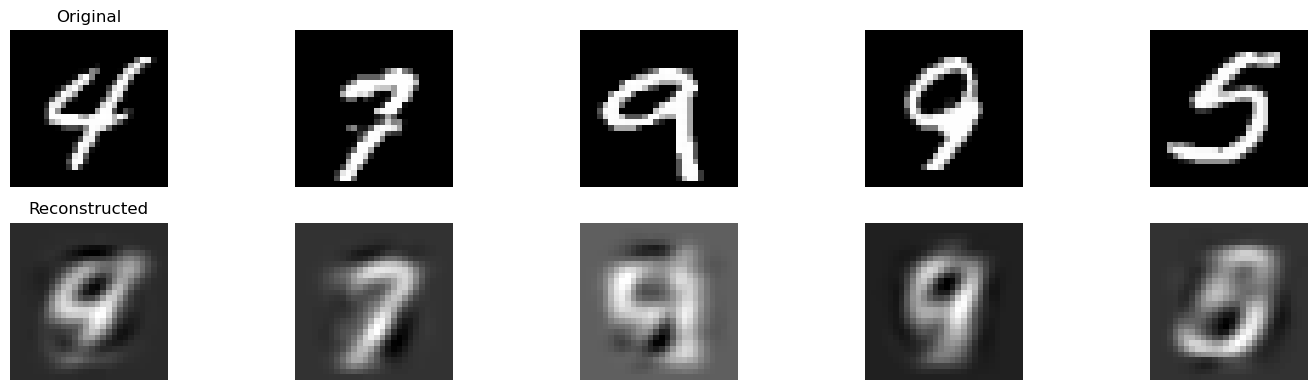


Reconstruction using 50 components:


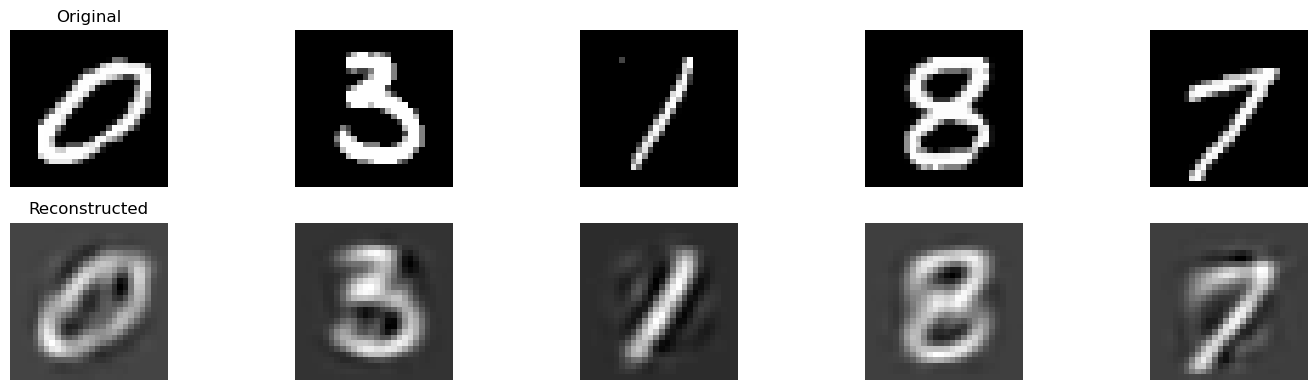

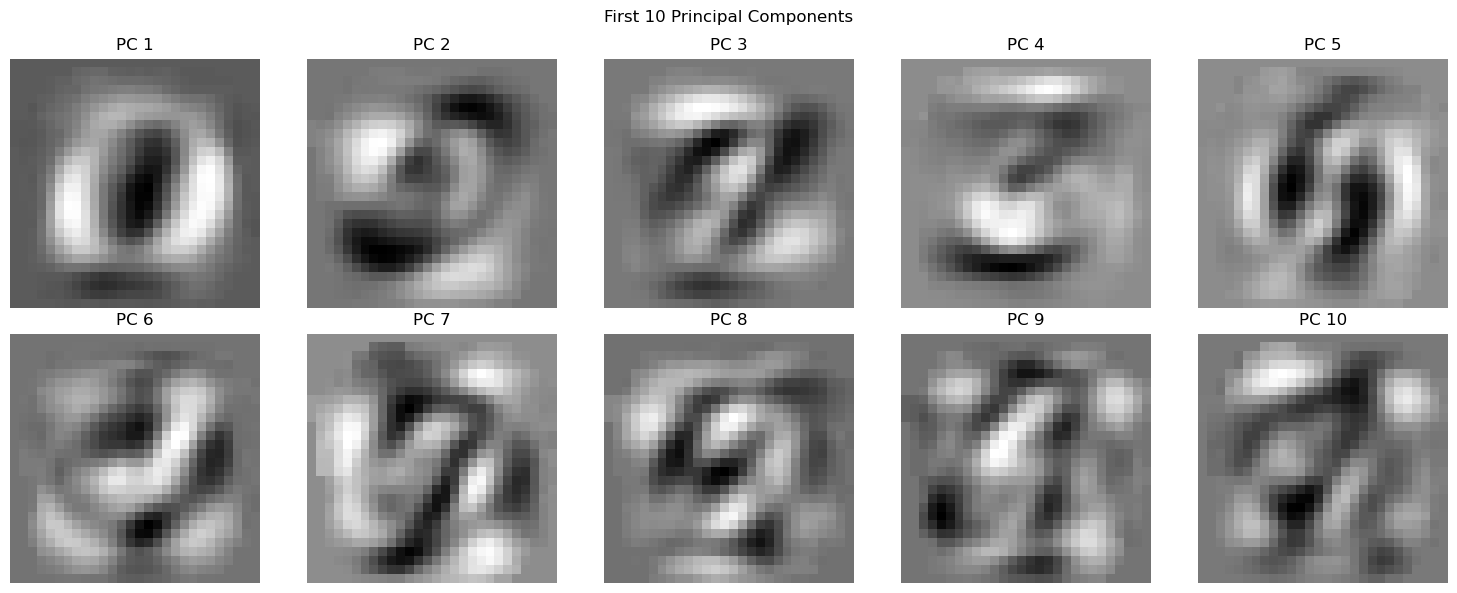

In [9]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load MNIST data
print("Loading MNIST data...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X[:5000]  # Using subset for faster computation
y = y[:5000]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
n_components = 100
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 5))
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, n_components + 1), cumsum, 'b-', label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of PCA Components')
plt.grid(True)
plt.legend()
plt.show()

# Find number of components needed for different variance thresholds
for threshold in [0.7, 0.8, 0.9, 0.95]:
    n_components = np.argmax(cumsum >= threshold) + 1
    print(f"Components needed for {threshold*100}% variance: {n_components}")

# Visualize original vs reconstructed digits
def plot_digits(original, reconstructed, indices):
    fig, axes = plt.subplots(2, len(indices), figsize=(15, 4))
    for i, idx in enumerate(indices):
        # Original
        axes[0, i].imshow(original[idx].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        if i == 0:
            axes[0, i].set_title('Original')
        
        # Reconstructed
        axes[1, i].imshow(reconstructed[idx].reshape(28, 28), cmap='gray')
        axes[1, i].axis('off')
        if i == 0:
            axes[1, i].set_title('Reconstructed')
    
    plt.tight_layout()
    plt.show()

# Reconstruct images using different numbers of components
for n_comp in [10, 50]:
    pca_reduced = PCA(n_components=n_comp)
    X_transformed = pca_reduced.fit_transform(X_scaled)
    X_reconstructed = pca_reduced.inverse_transform(X_transformed)
    X_reconstructed = scaler.inverse_transform(X_reconstructed)
    
    # Plot some example digits
    indices = np.random.randint(0, len(X), 5)
    print(f"\nReconstruction using {n_comp} components:")
    plot_digits(X, X_reconstructed, indices)

# Visualize first few principal components
n_components_viz = 10
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(n_components_viz):
    component = pca.components_[i].reshape(28, 28)
    axes[i].imshow(component, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'PC {i+1}')

plt.suptitle('First 10 Principal Components')
plt.tight_layout()
plt.show()

Loading MNIST data...

1. Analyzing Principal Components...


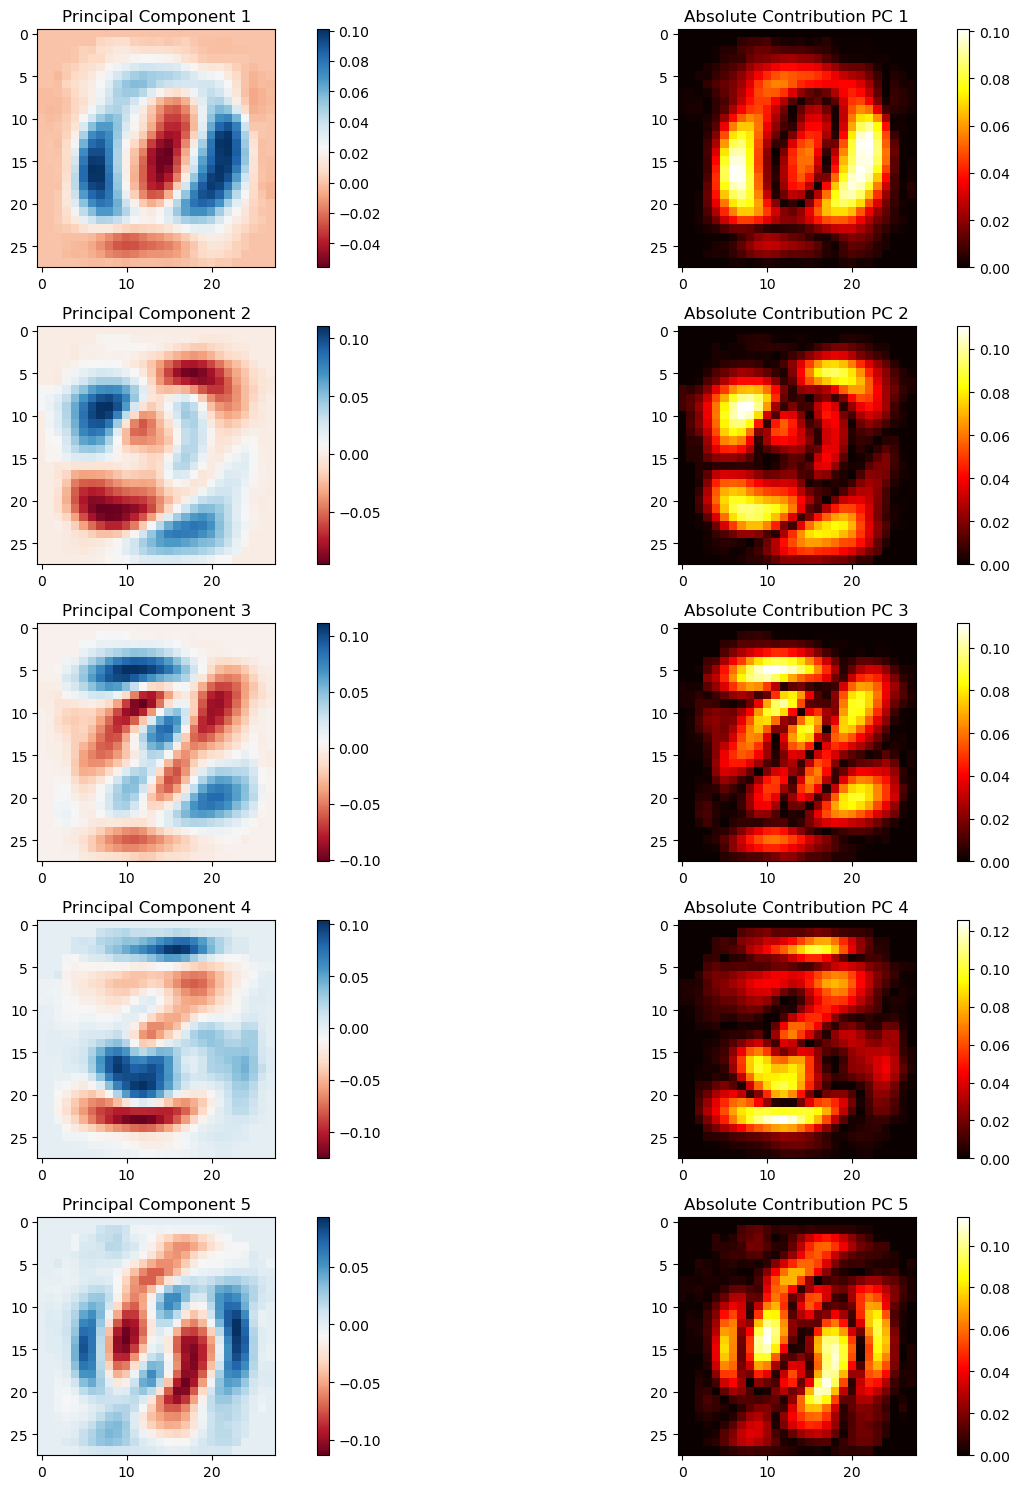


2. Analyzing Compression vs Reconstruction Quality...


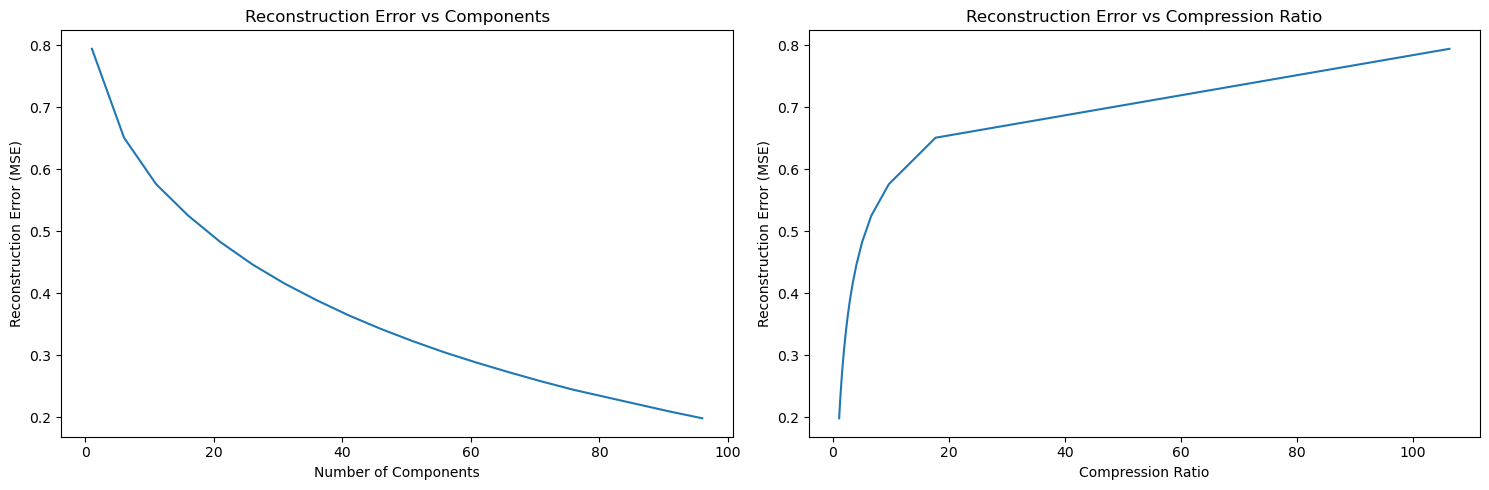


3. Analyzing Optimal Component Selection...


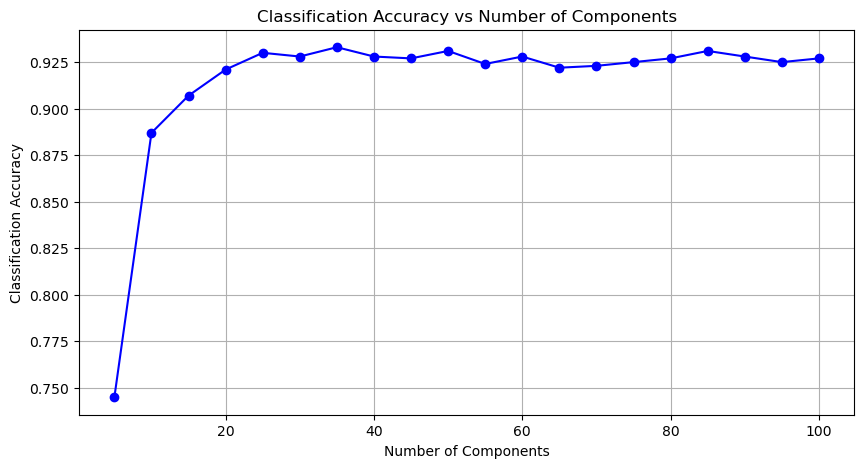

Optimal number of components for classification: 35
Maximum accuracy achieved: 0.9330


In [10]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load and prepare MNIST data
print("Loading MNIST data...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X[:5000]  # Using subset for faster computation
y = y[:5000]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Interpreting Principal Components
def analyze_principal_components(pca, n_components=5):
    """Analyze the contribution of each pixel to principal components"""
    plt.figure(figsize=(15, 3*n_components))
    
    for i in range(n_components):
        component = pca.components_[i]
        
        # Plot the component
        plt.subplot(n_components, 2, 2*i + 1)
        plt.imshow(component.reshape(28, 28), cmap='RdBu')
        plt.title(f'Principal Component {i+1}')
        plt.colorbar()
        
        # Plot absolute contribution of each pixel
        plt.subplot(n_components, 2, 2*i + 2)
        plt.imshow(np.abs(component).reshape(28, 28), cmap='hot')
        plt.title(f'Absolute Contribution PC {i+1}')
        plt.colorbar()
    
    plt.tight_layout()
    plt.show()

# 2. Compression vs Reconstruction Quality Analysis
def analyze_compression_quality(X_scaled, max_components=100):
    """Analyze the tradeoff between compression and reconstruction quality"""
    reconstruction_errors = []
    compression_ratios = []
    
    for n in range(1, max_components + 1, 5):
        pca = PCA(n_components=n)
        X_transformed = pca.fit_transform(X_scaled)
        X_reconstructed = pca.inverse_transform(X_transformed)
        
        # Calculate reconstruction error (MSE)
        mse = np.mean((X_scaled - X_reconstructed) ** 2)
        reconstruction_errors.append(mse)
        
        # Calculate compression ratio
        original_size = X_scaled.shape[1]  # 784
        compressed_size = n * (1 + X_scaled.shape[0]/original_size)
        compression_ratio = original_size / compressed_size
        compression_ratios.append(compression_ratio)
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    ax1.plot(range(1, max_components + 1, 5), reconstruction_errors)
    ax1.set_xlabel('Number of Components')
    ax1.set_ylabel('Reconstruction Error (MSE)')
    ax1.set_title('Reconstruction Error vs Components')
    
    ax2.plot(compression_ratios, reconstruction_errors)
    ax2.set_xlabel('Compression Ratio')
    ax2.set_ylabel('Reconstruction Error (MSE)')
    ax2.set_title('Reconstruction Error vs Compression Ratio')
    
    plt.tight_layout()
    plt.show()

# 3. Optimal Component Selection Analysis
def analyze_optimal_components(X_scaled, y, max_components=100):
    """Analyze classification performance with different numbers of components"""
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )
    
    accuracies = []
    components_range = range(5, max_components + 1, 5)
    
    for n in components_range:
        # Reduce dimensionality
        pca = PCA(n_components=n)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        # Train and evaluate classifier
        clf = KNeighborsClassifier(n_neighbors=3)
        clf.fit(X_train_pca, y_train)
        accuracy = clf.score(X_test_pca, y_test)
        accuracies.append(accuracy)
    
    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(components_range, accuracies, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Classification Accuracy')
    plt.title('Classification Accuracy vs Number of Components')
    plt.grid(True)
    plt.show()
    
    # Find optimal number of components
    optimal_components = components_range[np.argmax(accuracies)]
    print(f"Optimal number of components for classification: {optimal_components}")
    print(f"Maximum accuracy achieved: {max(accuracies):.4f}")

# Run the analyses
pca = PCA(n_components=100)
pca.fit(X_scaled)

print("\n1. Analyzing Principal Components...")
analyze_principal_components(pca)

print("\n2. Analyzing Compression vs Reconstruction Quality...")
analyze_compression_quality(X_scaled)

print("\n3. Analyzing Optimal Component Selection...")
analyze_optimal_components(X_scaled, y)

# now, it seems like PCA is kind of like CNN's where one PC is detecting edges,

# another horizontal strokes, third vertical strokes etc 

### the question is how is it different from CNN's? 

###### Yes, there are some interesting similarities and differences between PCA and CNNs in how they analyze images! Let me break this down:

Similarities:
1. Feature Extraction
- Both learn to detect basic visual patterns like edges and strokes
- Both create hierarchical representations of the image
- Both reduce the raw pixel data into more meaningful features

Key Differences:
1. Learning Method
- PCA: Linear, unsupervised transformation that maximizes variance
- CNNs: Non-linear, supervised learning with trainable filters/weights

2. Feature Hierarchy
- PCA: All features are learned globally and simultaneously
- CNNs: Features are learned hierarchically (edges → shapes → patterns → objects)

3. Spatial Awareness
- PCA: Treats image as flat vector, losing spatial relationships
- CNNs: Preserve spatial relationships through local connectivity and pooling

Let me create a visualization to demonstrate these differences:



```python
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load and prepare MNIST data
(X_train, y_train), _ = tf.keras.datasets.mnist.load_data()
X_train = X_train[:1000]  # Using subset for faster computation
y_train = y_train[:1000]

# Prepare data for both PCA and CNN
X_pca = X_train.reshape(len(X_train), 784)
X_cnn = X_train.reshape(-1, 28, 28, 1) / 255.0

# 1. PCA Analysis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)
pca = PCA(n_components=16)
pca.fit(X_scaled)

# 2. Create and train a simple CNN
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_cnn, y_train, epochs=3, batch_size=32, verbose=0)

# Function to visualize features
def plot_feature_comparison():
    fig, axes = plt.subplots(2, 8, figsize=(20, 6))
    
    # Plot PCA components
    for i in range(8):
        component = pca.components_[i].reshape(28, 28)
        axes[0, i].imshow(component, cmap='RdBu')
        axes[0, i].axis('off')
        axes[0, i].set_title(f'PCA Component {i+1}')
    
    # Plot CNN filters from first layer
    first_layer_weights = model.layers[0].get_weights()[0]
    for i in range(8):
        filter_img = first_layer_weights[:, :, 0, i]
        axes[1, i].imshow(filter_img, cmap='RdBu')
        axes[1, i].axis('off')
        axes[1, i].set_title(f'CNN Filter {i+1}')
    
    plt.suptitle('PCA Components vs CNN Filters', y=1.05)
    axes[0, 0].set_ylabel('PCA\nComponents')
    axes[1, 0].set_ylabel('CNN\nFilters')
    plt.tight_layout()
    plt.show()


1. Feature Characteristics:
- PCA Components:
  * Show global patterns across entire image
  * Earlier components capture major variations (thick vs thin, slanted vs straight)
  * Components are orthogonal (must be uncorrelated)

- CNN Filters:
  * Show local patterns (small 3x3 filters)
  * Learn specific edge detectors, texture patterns
  * Can learn redundant but useful features

2. Feature Activation:
- PCA:
  * Each image gets a single value per component
  * Linear combination of components reconstructs image
  * Global transformation of entire image

- CNN:
  * Creates feature maps showing where patterns appear
  * Preserves spatial information
  * Can detect same feature in different locations

3. Key Advantages of Each:
- PCA:
  * Efficient dimensionality reduction
  * Guaranteed optimal linear reconstruction
  * Computationally simpler

- CNN:
  * Better at complex pattern recognition
  * Spatial awareness
  * Can learn hierarchical features
  * Translation invariant

This is why CNNs generally perform better for image classification - they can learn more complex, spatially-aware features. However, PCA remains useful for:
- Dimensionality reduction
- Feature preprocessing
- Data compression
- Understanding global image patterns

Would you like me to elaborate on any of these aspects or show more specific examples of how these differences affect real-world performance?

# asking chatgpt about PCA

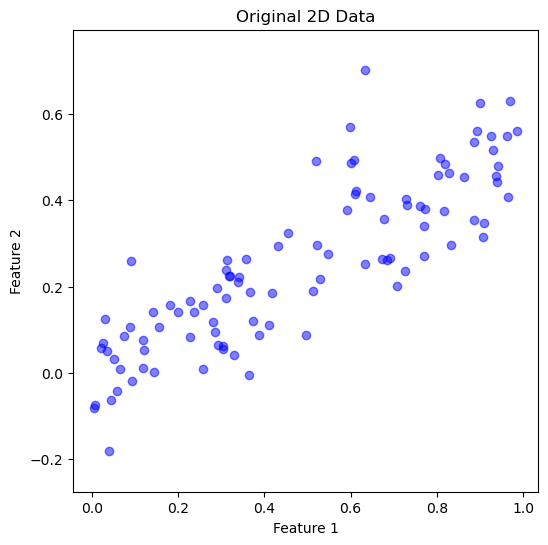

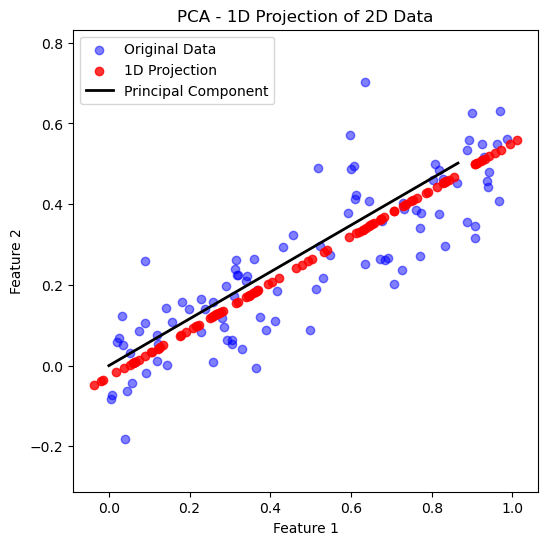

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate synthetic 2D data with two correlated features
np.random.seed(42)
X = np.random.rand(100, 2)
X[:, 1] = X[:, 0] * 0.5 + np.random.normal(scale=0.1, size=100)

# Plot the original data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.show()

# Apply PCA to reduce the data to 1D
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Transform the principal component back to 2D for visualization
X_reconstructed = pca.inverse_transform(X_pca)

# Plot the original data with the principal component direction
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5, label="Original Data")
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], color='red', alpha=0.8, label="1D Projection")
plt.plot([0, pca.components_[0, 0]], [0, pca.components_[0, 1]], color='black', linewidth=2, label="Principal Component")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("PCA - 1D Projection of 2D Data")
plt.legend()
plt.axis("equal")
plt.show()